# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que se proporciona tiene modificaciones del original. Se redujo el tamaño del conjunto para que los cálculos se hicieran más rápido e introduje valores ausentes y duplicados. Se tuvo cuidado de conservar las distribuciones de los datos originales cuando se hizo los cambios.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y se usaran todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Se lee los archivos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. 


In [35]:
# importacion de librerías
import pandas as pd #libreria para acceder a los dataframes
import numpy as np #libreria para el usoo de arrays
import matplotlib.pyplot as plt #libreria para visualizar informacion

In [36]:
#Se lee todo el conjunto de datos y se configura para que el separador sea una coma.
df_instacart=pd.read_csv('C:/Users/andre/Documents/TRIPLETEN ANALISIS DE DATOS/Proyectos/Proyecto_2/instacart_orders.csv',sep=';')
df_products=pd.read_csv('C:/Users/andre/Documents/TRIPLETEN ANALISIS DE DATOS/Proyectos/Proyecto_2/products.csv',sep=';')
df_aisles=pd.read_csv('C:/Users/andre/Documents/TRIPLETEN ANALISIS DE DATOS/Proyectos/Proyecto_2/aisles.csv',sep=';')
df_departments=pd.read_csv('C:/Users/andre/Documents/TRIPLETEN ANALISIS DE DATOS/Proyectos/Proyecto_2/departments.csv',sep=';')
df_order_products=pd.read_csv('C:/Users/andre/Documents/TRIPLETEN ANALISIS DE DATOS/Proyectos/Proyecto_2/order_products.csv',sep=';')

In [37]:
# mostrar información del DataFrame
#La primera ves que se llamo a info se observo que order_dow deberia ser day por lo que se realiza el cambio.
new_name={'order_dow':'order_day'}
df_instacart.rename(columns=new_name, inplace=True)
df_instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_day               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [38]:
# mostrar información del DataFrame
#se usa el parametro de show counts dentro de info para poder mostrar los valores nulos. 
df_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [39]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [40]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [41]:
# mostrar información del DataFrame
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

1)En primer lugar se puede ver que los datos vienen en un formato CSV el cual la coma no es el principal elemento separador , por lo que previamente a la visualizacion de la informacion los datos , se procedio a cambiar el separador para mostrar los datos de forma correcta.

2) Explorando los datos de instacar solo la columna de days_since_prior_order tiene valores faltantes por lo que hay que corroborar esa informacion para el avance. Con respecto a la columna products la columna de add_to car tiene valores faltantes por lo que de igual manera hay que corroborar. 

3) Para la tabla de order_products se tiene que en reordered existen valores faltantes. Se puede mencionar tambien que contamos con datos en su mayoria de tipo entero , asi mismo se tiene flotantes y de tipo object es decir string. De iugal manera se puede observar que la columna dow corresponde a la columna day.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Se verifica y corrige los tipos de datos 
- Se identifica y completa los valores ausentes.
- Se identifica y elimina los valores duplicados.



## Se procede a verificar si existen valores duplicados en cada una de las tablas por usar.

### `instacart_orders` data frame

In [42]:
# Revisa si hay pedidos duplicados
df_instacart['order_id'].duplicated().sum()

np.int64(15)

Existen 15 valores duplicados en instacart 

In [43]:
#Se va a verificar todos los pedidos que se hicieron el miercoles a las 2:00 am 

#Para esto se usa el metodo query el cual el dia miercoles equivale a Tres, y el horario de 2am equivale al entero 2.
order_wednesday=df_instacart.query("order_day==3 and order_hour_of_day==2")
print(order_wednesday) #muestra el dataframe filtrado 
print('Los pedidos duplicados son: ')
print(order_wednesday['order_id'].duplicated().sum()) #del dataframe filtrado , se busca los pedidos duplicados.


        order_id  user_id  order_number  order_day  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   


El dia miercoles a las 2 am , se produjeron todos los duplicados que en este caso son 15, por lo que primero se consulta o se analiza que paso para luego proceder con la eliminacion.

In [44]:
# Se elimina los pedidos duplicados
df_instacart.drop_duplicates(inplace=True) 
# Vuelve a verificar si hay filas duplicadas
print(df_instacart.duplicated().sum())

0


In [45]:
# Vuelve a verificar si hay IDs duplicados de pedidos
df_instacart['order_id'].duplicated().sum()

np.int64(0)


En esta primera parte se procedio a analizar los elementos duplicados, donde nos guiamos en base al id del producto , se pudo encontrar que existian 15 elementos duplcicados ,el cual los eliminamos con exito. Se comprobo que estos duplicados estaban presentes los dias miercoles a las 2am. 

### `products` data frame

In [46]:
#Se verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()

np.int64(0)

In [47]:
# Verifica si hay IDs duplicadas de productos
df_products['product_id'].duplicated().sum()

np.int64(0)

In [48]:
# Se revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name']=df_products['product_name'].str.upper() #Se convirtio todos los valores de la columna product name en mayuscula
df_products['product_name'].duplicated().sum()

np.int64(1361)

In [49]:
# Se revisa si hay nombres duplicados de productos no faltantes
nan_product_name=df_products.dropna(subset=['product_name'],inplace=False) #elimino los valores faltantes correspondientes a la fila product_name
print(nan_product_name.duplicated().sum())




0



En primer lugar se comprobo si en filas completas del dataframes de products existian duplicados , el cual no contiene. Luego en el producto id se comprobo si existian duplicados y tampoco contienen , y luego en la columna de product name se convirtieron todos los valores a mayusculas y se comprobo que existen 1361 valores duplicados , en los cuales con el ultimo procedimiento al momento de eliminar los valores nulos , se pudo captar que realmente estos valores duplicados , eran valores ausentes.

### `departments` data frame

In [50]:
# Se revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()


np.int64(0)

In [51]:
# Se revisa si hay IDs duplicadas de productos
df_departments['department_id'].duplicated().sum()

np.int64(0)


No se encontraron valores duplicados.

### `aisles` data frame

In [52]:
# Se revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()


np.int64(0)

In [53]:
# Se revisa si hay IDs duplicadas de productos
df_aisles['aisle_id'].duplicated().sum()

np.int64(0)


No se encontraron valores duplicados ni en filas completas ni en aisle_id

### `order_products` data frame

In [54]:
# Se revisa si hay filas totalmente duplicadas
df_order_products.duplicated().sum()

np.int64(0)


No se encontraron valores duplicados 


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [55]:
# Se encuentra los valores ausentes en la columna 'product_name'
val_nan_products=df_products[df_products['product_name'].isna()]
val_nan_products

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21



Se puede observar que existen 1258 en la columna product_name valores ausentes , y se puede ver a primera vista que en gran medida que es en la isla 100 y el departamento 21

In [83]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
#para realizar esta comparacion se procedera a acceder a la columna aisle id y verificar cuantos valores en la isla son 100
nan_aisle=val_nan_products[val_nan_products['aisle_id']==100]['aisle_id'].count()
print(nan_aisle)

1258



Se puede ver que efecivamente todos los valores ausentes estan en la isla con ID100.

In [57]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
#se procede a realizar la misma ejercucion que el apartado anterior pero ahora para verificar en el id_department
nan_department=val_nan_products[val_nan_products['department_id']==21]['department_id'].count()
nan_department

np.int64(1258)


Efectivamente  todos los valores ausentes corresponden con la columna de ID21.

Describe brevemente cuáles son tus hallazgos.

In [81]:
# Completa los nombres de productos ausentes con 'Unknown'
#PREGUNTA EN QUE TABLA TENGO QUE COMPLETAR LOS VALOES AUSENTES?
df_products['product_name'].fillna('Unknown',inplace=True)


C:\Users\andre\AppData\Local\Temp\ipykernel_22876\1169141154.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['product_name'].fillna('Unknown',inplace=True)




Se completron los valores ausentes con la palabra 'Unknown'.

### `orders` data frame

In [59]:
# Encuentra los valores ausentes
df_instacart.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_day                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [60]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# Se realiza una condicion para filtrar las ordenes mayores a uno y se evalua los valores vacios.
non_first_order=df_instacart[df_instacart['order_number']  > 1]
print(non_first_order.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_day                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64




Se observa como las ordenes mayores a 1 no tiene valores ausentes , por lo cual se puede confirmar que los valores ausentes corresponden al primer pedido del cliente.

### `order_products` data frame

In [61]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [62]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())

1.0
64.0



Con esta informacion se puede ver que el valor minimo es 1 y el valo rmaximo es 64.

In [63]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_nan_add_order=df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']


In [82]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos? valores ausentes de pedidos o de add to cart order?
all_nan_order_64=df_order_products[df_order_products['order_id'].isin(id_nan_add_order)]
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
all_nan_order_group=all_nan_order_64.groupby('order_id')['product_id'].count()
print(all_nan_order_group.min())
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

65



En esta parte del enunciado se guardaron todos los IDS de pedidos con valores ausentes en un nuevo dataframe para luego agregar esta columna con solo valores ausentes a una nueva variable para que esta la podamos usar , para agrupar los datos con su order_id y podamos contar los product_id para verificar el valor minimo , y entender que todos los valores ausentes tienen minimo 65 productos.

In [65]:
# Remplaza los valores ausentes en la columna 'add_to_cart con el valor de  999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
print(df_order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None



En la opcion del carrito se pudo encontrar que existian valores ausentes , aun asi se procedio a clasificarlos segun su numero de pedido , de igual manera una ves que se encontraron con todos los valores ausentes , se los cambio con el valor de 999. 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Este primer preprocesamiento de datos , ayudo a familiarizarse en primer lugar con los datos , de igual manera con los tipos de datos que tenemos y como vamos a trabajar con ellos. Se encontraron algunos duplicados los cuales se procesio a limpiarlos de igual manera con valores ausentes , que se procedio a reemplazarlos respetando si eran categoricos o numericos. A continuacion se mostrara el resultado para que gracias a la visualizacion se sepa mas a fondo que pasa con los datos.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, se hace el siguiente análisis:



1. Se verifica que los valores en las columnas `'order_hour_of_day'` y `'order_day'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Se crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Se crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Se crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [89]:
df_instacart['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [90]:
df_instacart['order_day'].unique()


array([6, 5, 0, 4, 3, 1, 2])

Se puede ver con los valores unicos que los rangos son los deseados las cuales las columnas lo tienen.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<Axes: title={'center': 'Ordenes por hora del dia'}, xlabel='Horas del dia', ylabel='Numero de pedidos'>

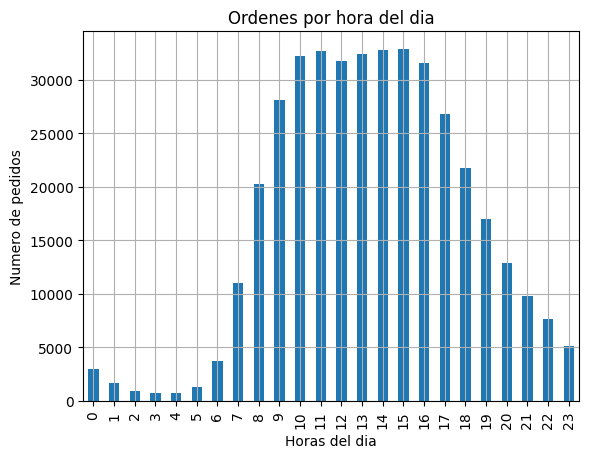

In [68]:
#se agruparon los datos en las horas del dia y el numero de identificador de cada usuario para poder contar cuantos usuarios
#logran hacer pedidos en el transcurso del dia , y para esto se uso la funcion nunique que cuenta el numero de valores unicos.
df_instacart_grupo1=df_instacart.groupby('order_hour_of_day')['user_id'].nunique() 
#se procedio a imprimir el resultad.
df_instacart_grupo1.plot(title='Ordenes por hora del dia',kind='bar',xlabel='Horas del dia',
                        ylabel='Numero de pedidos',
                        grid=True,
                        )

En el análisis de la distribución de pedidos por hora, se observa un claro pico de actividad a las 3 p.m., lo que indica que es el horario de mayor demanda. Además, el periodo comprendido entre las 10 a.m. y las 4 p.m. representa el intervalo con mayor volumen de pedidos, sugiriendo que la mayoría de los clientes realizan sus compras en este rango horario. Por otro lado, las horas de la madrugada muestran una actividad significativamente reducida, lo que refleja una baja propensión a realizar pedidos durante ese tiempo.

### [A3] ¿Qué día de la semana compran víveres las personas?

<Axes: title={'center': 'COMPRA DE VIVERES POR SEMANA'}, xlabel='Dia de la semana', ylabel='Numero de compras'>

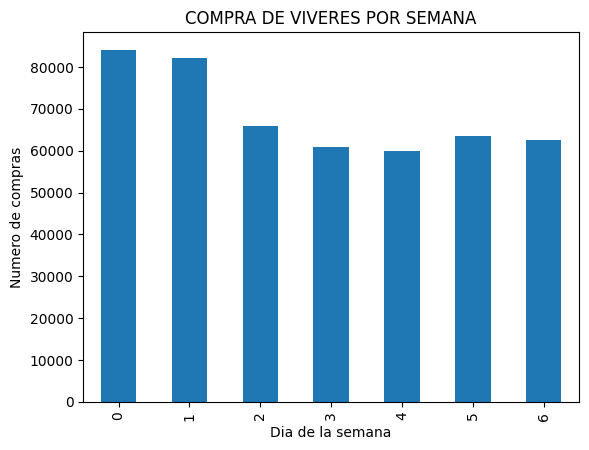

In [69]:
#para este ejercicio se usa la comparacion entre order day y user day y se usa count porque en este caso una persona puede hacer
#varios pedidos y tambien hay que contabilizar eso.
df_instacart_grupo2=df_instacart.groupby('order_day')['user_id'].count()
#se muestra la grafica 
df_instacart_grupo2.plot(title='COMPRA DE VIVERES POR SEMANA',xlabel='Dia de la semana',ylabel='Numero de compras',kind='bar')


El análisis muestra que el domingo es el día con mayor volumen de pedidos de víveres en la semana, seguido de cerca por el lunes. El martes también registra un número considerable de pedidos, posicionándose inmediatamente después del lunes en términos de actividad. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<Axes: title={'center': 'LOS NUEVOS PEDIDOS'}, xlabel='Dias transcurridos', ylabel='Numero de usuarios '>

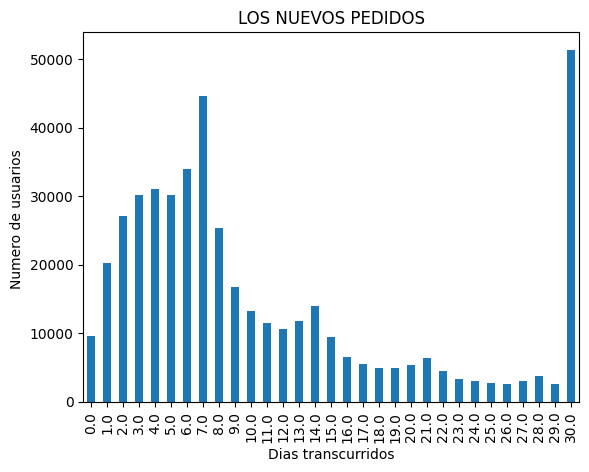

In [70]:
df_instacart_grupo3=df_instacart.groupby('days_since_prior_order')['user_id'].count()
df_instacart_grupo3.plot(title='LOS NUEVOS PEDIDOS',xlabel='Dias transcurridos',ylabel='Numero de usuarios ',kind='bar')


El análisis revela que la mayoría de los usuarios esperan 30 días antes de realizar un nuevo pedido, mientras que un número significativo de usuarios opta por hacer su pedido semanalmente. Esta información es valiosa, ya que proporciona una comprensión más profunda del comportamiento de los clientes y puede ser utilizada estratégicamente para mejorar la experiencia del usuario y optimizar las operaciones.

# SE PROCEDE CON DEMAS PREGUNTAS PARA ANALIZAR LOS DATOS

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? sE Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Se grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

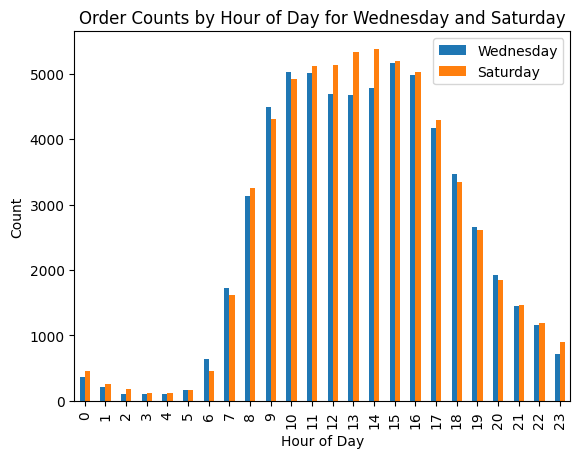

In [91]:

# Filtrar los DataFrames para los días miércoles y sábado
df_filtrado_we = df_instacart[df_instacart['order_day'] == 3]
df_filtrado_sa = df_instacart[df_instacart['order_day'] == 6]

# Contar cuántos valores únicos hay en cada hora del día miércoles y sábado, y ordenarlos por índice
df_filtrado_we_sor = df_filtrado_we['order_hour_of_day'].value_counts().sort_index()
df_filtrado_sa_sor = df_filtrado_sa['order_hour_of_day'].value_counts().sort_index()

# Crear un DataFrame con los datos ordenados
filtrado = pd.concat([df_filtrado_we_sor, df_filtrado_sa_sor], axis=1)

# Renombrar las columnas para claridad
filtrado.columns = ['Wednesday', 'Saturday']

# Graficar los datos
filtrado.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Order Counts by Hour of Day for Wednesday and Saturday')
plt.show()




Ambos días muestran una tendencia similar en cuanto al número de pedidos por hora. Sin embargo, se observa que, en general, los sábados tienden a registrar un mayor volumen de pedidos en comparación con los miércoles. Además, se destaca que el rango horario entre las 10 a.m. y las 4 p.m. es el periodo con la mayor concentración de pedidos en ambos días.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Histograma del Número Total de Pedidos por Cliente')

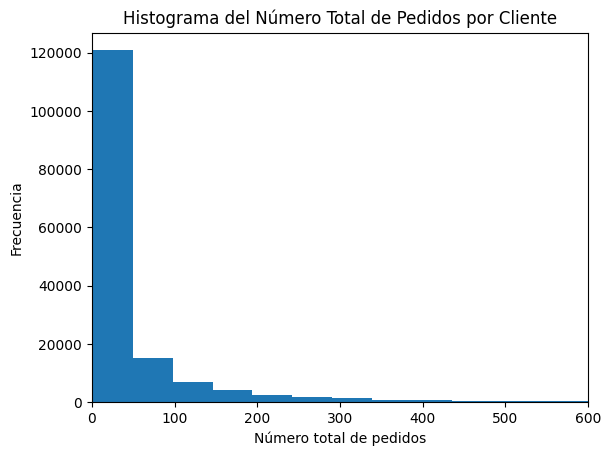

In [73]:
#agrupe la columna user_ id qeu es id del cliente y sume todos sus pedidos para luego mostrarlo en el Histograma
df_instacart_clients=df_instacart.groupby('user_id')['order_number'].sum()
print(df_instacart_clients.plot(kind='hist',xlim=[0,600],bins=30))
plt.xlabel('Número total de pedidos')
plt.ylabel('Frecuencia')
plt.title('Histograma del Número Total de Pedidos por Cliente')


Aqui se puede ver la distribucion del numero total de pedidos por cliente, y con que frecuencia lo hacen.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [94]:
#para esto hay que unir dos dataframes , se usara el dataframe df_products y df_order_products ya que el primero tiene informacion
# de los productos y el segundo tiene informacion de los pedidos relacionados con los productos
#Primero que todo 
order_products_mer_products=df_order_products.merge(df_products,on='product_id') #unimos los dos dataframes para tener los valores correctos
#luego de la tabla unida , agrupamos el product id y el product name para luego contar cuantas ordenes se han hecho cada una
#y de ahi se ordena los datos de mayor a menor 
order_products_mer_products_pop=order_products_mer_products.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)
#por ultimo se muestra los primeros 20.
order_products_mer_products_pop.head(20)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


Después de revisar toda la información y analizar los gráficos, se pueden identificar varios factores clave: los pedidos están influenciados tanto por la hora del día como por el día de la semana. Además, es posible observar el comportamiento de los clientes, incluyendo la frecuencia con la que realizan sus compras y cuáles son los productos más solicitados, como se muestra en la última figura.

En esta última parte, se destaca que la banana es el producto más demandado. Al analizar el resto de los artículos, se observa que predominan productos de primera necesidad, como frutas, tales como bananas, fresas, aguacates, limones, entre otros.

# Los ultimos analisis para llegar a las conclusiones.

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Las personas compran normalemente
10 articulos en un pedido y una mediana de 8


<Axes: xlabel='numero de ordenes', ylabel='frecuencia'>

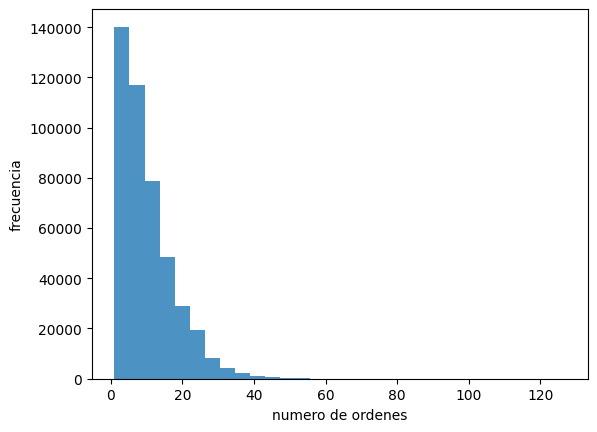

In [75]:
#se hace una agrupacion de order id , donde se contara la cantidad de productos que hay en cada orden 
or_pro_mean=df_order_products.groupby('order_id')['product_id'].count()
print('Las personas compran normalemente')
#se muestra el promedio y la mediana 
print(f'{or_pro_mean.mean():.0f} articulos en un pedido y una mediana de {or_pro_mean.median():.0f}')
#se grafica el histograma 
or_pro_mean.plot(kind='hist',xlabel='numero de ordenes',ylabel='frecuencia',bins=30,alpha=0.8)





Se puede ver como la mayoria de articulos que existen en un pedido es de 10 unidades , de igual manera la mediana de estos pedidos es de 8. En su grafica se puede ver los errores.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [76]:
#el dataframe order_products_mer_products ya tenia ambos ambas tablas unidas por lo que se filtro en reordered ==1 
reordered_products=order_products_mer_products[order_products_mer_products['reordered']==1]
#se agrupo las columnas de product_id y product name y con esto se conto el numero de pedidos que han estado presente
fre_reordered_products=reordered_products.groupby(['product_id','product_name'])['order_id'].count()
#luego se mostro el resultado 
fre_reordered_products.sort_values(ascending=False).head(20)

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: order_id, dtype: int64

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [77]:
# contiene el total de pedidos 
order_products_total=order_products_mer_products.groupby(['product_id','product_name'])['order_id'].count() 
#contiene el numero de repeticiones de los pedidos 
fre_reordered_products

#se realiza una division para tener la tasa de repeticion del pedido 
tasa_repeticion_ordenes= fre_reordered_products.div(order_products_total)
tasa_repeticion_ordenes


product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           0.564286
2           ALL-SEASONS SALT                                                          NaN
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 0.738095
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    0.510204
7           PURE COCONUT WATER WITH ORANGE                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

Este filtro revela que la mayoría de los productos presentan una alta tasa de repetición. Además, permite identificar productos específicos, facilitando el análisis detallado de su tasa de repetición para obtener resultados más precisos.


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [78]:
#Para este apartado se usaran dos dataframes df_instacart y df_order_products

In [79]:
#se unen los dos dataframes para trabajar con ellos 
order_instacart_mer_order_products=df_instacart.merge(df_order_products,on='order_id')
#se cuenta el numero total de ordenes para todos los clientes
total_ordered_client=order_instacart_mer_order_products.groupby('user_id')['order_id'].count()
#se filtra los que no son nuevas ordenes , es decir alguien que ya haya hecho el pedido
reordered_client=order_instacart_mer_order_products[order_instacart_mer_order_products['reordered']==1]
#se procede a agrupar para contar 
reordered_client_group=reordered_client=reordered_client.groupby('user_id')['order_id'].count()
# se realiza la division 
total_tasa_client=reordered_client.div(total_ordered_client)
total_tasa_client


user_id
2         0.038462
4              NaN
5         0.666667
6              NaN
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: order_id, Length: 149626, dtype: float64

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [80]:
#El dataframe que tiene la tabla de products y order_products
order_products_mer_products
#filtramos la columna de add_to_cart_order solo esten presente los primeros productos que se hayan puesto
first_orders=order_products_mer_products[order_products_mer_products['add_to_cart_order'] == 1]
#luego agrupamos por product)name y contamos los productos que mas se repitan
group_firts_orders=first_orders.groupby('product_name')['product_id'].count().sort_values(ascending=False)
group_firts_orders.head(20)

product_name
BANANA                         15562
BAG OF ORGANIC BANANAS         11026
ORGANIC WHOLE MILK              4363
ORGANIC STRAWBERRIES            3946
ORGANIC HASS AVOCADO            3390
ORGANIC BABY SPINACH            3336
ORGANIC AVOCADO                 3044
SPRING WATER                    2336
STRAWBERRIES                    2308
ORGANIC RASPBERRIES             2024
SPARKLING WATER GRAPEFRUIT      1914
ORGANIC HALF & HALF             1797
LARGE LEMON                     1737
SODA                            1733
ORGANIC REDUCED FAT MILK        1397
LIMES                           1370
HASS AVOCADOS                   1340
ORGANIC REDUCED FAT 2% MILK     1310
HALF & HALF                     1309
RASPBERRIES                     1246
Name: product_id, dtype: int64

### Conclusion general del proyecto:

El proyecto se concluyó con éxito mediante la limpieza exhaustiva de todos los datos de las tablas disponibles. Una vez depurados los datos, se procedió a la visualización gráfica para identificar tendencias y analizar las relaciones entre los compradores y los productos, así como los patrones de tiempo de compra. En la fase final, se integraron varias tablas para descubrir comportamientos clave de los clientes, tales como el ratio de repetición de productos y el orden de adición de productos al carrito. Este análisis detallado proporcionó una comprensión más profunda de las dinámicas de compra y facilitó la toma de decisiones basadas en datos.